In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.patches as mpatches

In [4]:
# File to Load
Average_Wkly_Earning_data_to_load = "Resources/Average weekly ordinary time earnings, full time adults by industry_by gender_v2.csv"

# Read School and Student Data File and store into Pandas DataFrames
Average_Wkly_Earning_data_df = pd.read_csv(Average_Wkly_Earning_data_to_load)
Average_Wkly_Earning_data_df


,Industry,Nov-21,Nov-21.1,May-21,May-21.1,Nov-20,Nov-20.1,May-20,May-20.1,Nov-19,Nov-19.1,May-19,May-19.1,Nov-18,Nov-18.1
0,Mining,2724.9,2306.3,2748.7,2276.8,2695.9,2295.8,2695.9,2295.8,2668.0,2302.0,2617.0,2286.0,2761.0,2093.0
1,Manufacturing,1601.5,1394.9,1608.8,1394.4,1599.1,1397.8,1599.1,1397.8,1504.0,1349.0,1471.0,1310.0,1448.0,1086.0
2,"Electricity, gas, water & waste services",2007.6,1850.8,1941.2,1793.2,1986.8,1790.0,1986.8,1790.0,1940.0,1732.0,1924.0,1703.0,1997.0,1518.0
3,Construction,1776.2,1468.0,1733.7,1445.1,1668.0,1394.4,1668.0,1394.4,1683.0,1389.0,1614.0,1397.0,1516.0,1003.0
4,Wholesale trade,1720.4,1441.6,1707.1,1451.8,1641.5,1427.3,1641.5,1427.3,1654.0,1386.0,1637.0,1390.0,1540.0,1127.0
5,Retail trade,1373.8,1231.6,1376.2,1227.9,1336.5,1220.4,1336.5,1220.4,1291.0,1181.0,1219.0,1172.0,868.0,670.0
6,Accommodation & food services,1276.1,1133.1,1252.6,1121.4,1217.0,1078.8,1217.0,1078.8,1220.0,1121.0,1207.0,1097.0,631.0,480.0
7,"Transport, postal & warehousing",1737.6,1497.7,1754.0,1487.5,1733.4,1494.3,1733.4,1494.3,1707.0,1436.0,1670.0,1410.0,1646.0,1098.0
8,Information media & telecommunications,2310.2,1941.0,2231.9,1860.5,2158.1,1812.2,2158.1,1812.2,2121.0,1757.0,2120.0,1758.0,1877.0,1437.0
9,Financial & insurance services,2333.3,1852.8,2319.7,1759.7,2272.6,1736.5,2272.6,1736.5,2177.0,1694.0,2237.0,1691.0,2082.0,1335.0


In [5]:
Average_Wkly_Earning_data_df = Average_Wkly_Earning_data_df[["Industry","Nov-21","Nov-21.1","Nov-20","Nov-20.1","Nov-19","Nov-19.1","Nov-18","Nov-18.1"]]
Average_Wkly_Earning_data_df

,Industry,Nov-21,Nov-21.1,Nov-20,Nov-20.1,Nov-19,Nov-19.1,Nov-18,Nov-18.1
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0


In [6]:
Average_Wkly_Earning_data_Selected_Year_df = Average_Wkly_Earning_data_df.rename(columns={"Nov-21":"Nov21_Male","Nov-21.1":"Nov21_Female","Nov-20":"Nov20_Male","Nov-20.1":"Nov20_Female","Nov-19":"Nov19_Male","Nov-19.1":"Nov19_Female","Nov-18":"Nov18_Male","Nov-18.1":"Nov18_Female"})
Average_Wkly_Earning_data_Selected_Year_df

,Industry,Nov21_Male,Nov21_Female,Nov20_Male,Nov20_Female,Nov19_Male,Nov19_Female,Nov18_Male,Nov18_Female
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0


In [7]:
Average_Wkly_Earning_data_Selected_Year_df_21Male =round(Average_Wkly_Earning_data_Selected_Year_df["Nov21_Male"].mean(),2)
Average_Wkly_Earning_data_Selected_Year_df_21Male

1853.41

In [8]:
Average_Wkly_Earning_data_Selected_Year_df_21Female =round(Average_Wkly_Earning_data_Selected_Year_df["Nov21_Female"].mean(),2)
Average_Wkly_Earning_data_Selected_Year_df_21Female

1584.54

In [9]:
Average_Wkly_Earning_data_Selected_Year_df_20Male =round(Average_Wkly_Earning_data_Selected_Year_df["Nov20_Male"].mean(),2)
Average_Wkly_Earning_data_Selected_Year_df_20Male

1804.77

In [10]:
Average_Wkly_Earning_data_Selected_Year_df_20Female =round(Average_Wkly_Earning_data_Selected_Year_df["Nov20_Female"].mean(),2)
Average_Wkly_Earning_data_Selected_Year_df_20Female

1546.69

In [11]:
Average_Wkly_Earning_data_Selected_Year_df_19Male =round(Average_Wkly_Earning_data_Selected_Year_df["Nov19_Male"].mean(),2)
Average_Wkly_Earning_data_Selected_Year_df_19Male

1767.89

In [12]:
Average_Wkly_Earning_data_Selected_Year_df_19Female =round(Average_Wkly_Earning_data_Selected_Year_df["Nov19_Female"].mean(),2)
Average_Wkly_Earning_data_Selected_Year_df_19Female

1508.74

In [13]:
Average_Wkly_Earning_data_Selected_Year_df_18Male =round(Average_Wkly_Earning_data_Selected_Year_df["Nov18_Male"].mean(),2)
Average_Wkly_Earning_data_Selected_Year_df_18Male

1530.11

In [14]:
Average_Wkly_Earning_data_Selected_Year_df_18Female =round(Average_Wkly_Earning_data_Selected_Year_df["Nov18_Female"].mean(),2)
Average_Wkly_Earning_data_Selected_Year_df_18Female

1105.16

In [15]:
#Average_Wkly_Earning_data_Selected_Year_df.append({"Industry":"Mean","Nov21_Male": Average_Wkly_Earning_data_Selected_Year_df_21Male,"Nov21_Female":Average_Wkly_Earning_data_Selected_Year_df_21Female,"Nov20_Male":Average_Wkly_Earning_data_Selected_Year_df_20Male,"Nov20_Female":Average_Wkly_Earning_data_Selected_Year_df_20Female,"Nov19_Male":Average_Wkly_Earning_data_Selected_Year_df_19Male,
#"Nov19_Female":Average_Wkly_Earning_data_Selected_Year_df_19Female,"Nov18_Male":Average_Wkly_Earning_data_Selected_Year_df_18Male,"Nov18_Female":Average_Wkly_Earning_data_Selected_Year_df_18Female},ignore_index=True)


#Average_Wkly_Earning_data_Selected_Year_df.head(20)

In [16]:
Average_wkly_Earning_by_industry_2018_df = Average_Wkly_Earning_data_Selected_Year_df.loc[:,["Industry","Nov18_Male","Nov18_Female"]]
Average_wkly_Earning_by_industry_2018_df 

,Industry,Nov18_Male,Nov18_Female
0,Mining,2761.0,2093.0
1,Manufacturing,1448.0,1086.0
2,"Electricity, gas, water & waste services",1997.0,1518.0
3,Construction,1516.0,1003.0
4,Wholesale trade,1540.0,1127.0
5,Retail trade,868.0,670.0
6,Accommodation & food services,631.0,480.0
7,"Transport, postal & warehousing",1646.0,1098.0
8,Information media & telecommunications,1877.0,1437.0
9,Financial & insurance services,2082.0,1335.0


In [17]:
Top_5_Average_wkly_Earning_by_industry_2018_df= Average_wkly_Earning_by_industry_2018_df.sort_values("Nov18_Male",ascending=False)
Top_5_Average_wkly_Earning_by_industry_2018_df.head()

,Industry,Nov18_Male,Nov18_Female
0,Mining,2761.0,2093.0
9,Financial & insurance services,2082.0,1335.0
2,"Electricity, gas, water & waste services",1997.0,1518.0
8,Information media & telecommunications,1877.0,1437.0
11,"Professional, scientific & technical services",1872.0,1317.0


In [18]:
Bottom_5_Average_wkly_Earning_by_industry_2018_df= Average_wkly_Earning_by_industry_2018_df.sort_values("Nov18_Male",ascending=False)
Bottom_5_Average_wkly_Earning_by_industry_2018_df.tail()

,Industry,Nov18_Male,Nov18_Female
12,Administrative & support services,1248.0,902.0
17,Other services,1179.0,772.0
16,Arts & recreation services,1060.0,746.0
5,Retail trade,868.0,670.0
6,Accommodation & food services,631.0,480.0


In [19]:
Average_wkly_Earning_by_industry_2019_df = Average_Wkly_Earning_data_Selected_Year_df.loc[:,["Industry","Nov19_Male","Nov19_Female"]]
Average_wkly_Earning_by_industry_2019_df 

,Industry,Nov19_Male,Nov19_Female
0,Mining,2668.0,2302.0
1,Manufacturing,1504.0,1349.0
2,"Electricity, gas, water & waste services",1940.0,1732.0
3,Construction,1683.0,1389.0
4,Wholesale trade,1654.0,1386.0
5,Retail trade,1291.0,1181.0
6,Accommodation & food services,1220.0,1121.0
7,"Transport, postal & warehousing",1707.0,1436.0
8,Information media & telecommunications,2121.0,1757.0
9,Financial & insurance services,2177.0,1694.0


In [20]:
Top_5_Average_wkly_Earning_by_industry_2019_df= Average_wkly_Earning_by_industry_2019_df.sort_values("Nov19_Male",ascending=False)
Top_5_Average_wkly_Earning_by_industry_2019_df.head()


,Industry,Nov19_Male,Nov19_Female
0,Mining,2668.0,2302.0
9,Financial & insurance services,2177.0,1694.0
8,Information media & telecommunications,2121.0,1757.0
11,"Professional, scientific & technical services",2067.0,1610.0
14,Education & training,1948.0,1715.0


In [21]:
Bottom_5_Average_wkly_Earning_by_industry_2019_df= Average_wkly_Earning_by_industry_2019_df.sort_values("Nov19_Male",ascending=False)
Bottom_5_Average_wkly_Earning_by_industry_2019_df.tail()

,Industry,Nov19_Male,Nov19_Female
10,"Rental, hiring & real estate services",1585.0,1296.0
1,Manufacturing,1504.0,1349.0
17,Other services,1295.0,1242.0
5,Retail trade,1291.0,1181.0
6,Accommodation & food services,1220.0,1121.0


In [22]:
Average_wkly_Earning_by_industry_2020_df = Average_Wkly_Earning_data_Selected_Year_df.loc[:,["Industry","Nov20_Male","Nov20_Female"]]
Average_wkly_Earning_by_industry_2020_df

,Industry,Nov20_Male,Nov20_Female
0,Mining,2695.9,2295.8
1,Manufacturing,1599.1,1397.8
2,"Electricity, gas, water & waste services",1986.8,1790.0
3,Construction,1668.0,1394.4
4,Wholesale trade,1641.5,1427.3
5,Retail trade,1336.5,1220.4
6,Accommodation & food services,1217.0,1078.8
7,"Transport, postal & warehousing",1733.4,1494.3
8,Information media & telecommunications,2158.1,1812.2
9,Financial & insurance services,2272.6,1736.5


In [23]:
Top_5_Average_wkly_Earning_by_industry_2020_df= Average_wkly_Earning_by_industry_2020_df.sort_values("Nov20_Male",ascending=False)
Top_5_Average_wkly_Earning_by_industry_2020_df.head()

,Industry,Nov20_Male,Nov20_Female
0,Mining,2695.9,2295.8
9,Financial & insurance services,2272.6,1736.5
11,"Professional, scientific & technical services",2201.0,1663.3
8,Information media & telecommunications,2158.1,1812.2
14,Education & training,1994.2,1759.5


In [24]:
Bottom_5_Average_wkly_Earning_by_industry_2020_df= Average_wkly_Earning_by_industry_2020_df.sort_values("Nov20_Male",ascending=False)
Bottom_5_Average_wkly_Earning_by_industry_2020_df.tail()

,Industry,Nov20_Male,Nov20_Female
1,Manufacturing,1599.1,1397.8
16,Arts & recreation services,1517.8,1375.6
5,Retail trade,1336.5,1220.4
17,Other services,1314.0,1339.0
6,Accommodation & food services,1217.0,1078.8


In [58]:
Average_wkly_Earning_by_industry_2021_df = Average_Wkly_Earning_data_Selected_Year_df.loc[:,["Industry","Nov21_Male","Nov21_Female"]]
Average_wkly_Earning_by_industry_2021_df.sort_values(by=['Nov21_Male', 'Nov21_Female'],ascending=False,inplace=True)
Average_wkly_Earning_by_industry_2021_df

,Industry,Nov21_Male,Nov21_Female
0,Mining,2724.9,2306.3
9,Financial & insurance services,2333.3,1852.8
8,Information media & telecommunications,2310.2,1941.0
11,"Professional, scientific & technical services",2266.9,1713.5
14,Education & training,2016.8,1797.2
2,"Electricity, gas, water & waste services",2007.6,1850.8
15,Health care & social assistance,1989.5,1563.4
13,Public administration & safety,1962.8,1796.2
18,Total all industries,1846.5,1591.2
3,Construction,1776.2,1468.0


In [26]:
Top_5_Average_wkly_Earning_by_industry_2021_df= Average_wkly_Earning_by_industry_2021_df.sort_values("Nov21_Male",ascending=False)
Top_5_Average_wkly_Earning_by_industry_2021_df.head()

,Industry,Nov21_Male,Nov21_Female
0,Mining,2724.9,2306.3
9,Financial & insurance services,2333.3,1852.8
8,Information media & telecommunications,2310.2,1941.0
11,"Professional, scientific & technical services",2266.9,1713.5
14,Education & training,2016.8,1797.2


In [27]:
Bottom_5_Average_wkly_Earning_by_industry_2021_df= Average_wkly_Earning_by_industry_2021_df.sort_values("Nov21_Male",ascending=False)
Bottom_5_Average_wkly_Earning_by_industry_2021_df.tail()

,Industry,Nov21_Male,Nov21_Female
12,Administrative & support services,1598.1,1378.3
16,Arts & recreation services,1593.5,1456.0
5,Retail trade,1373.8,1231.6
17,Other services,1344.7,1296.7
6,Accommodation & food services,1276.1,1133.1


In [28]:
#Set X axis and tick loctions
x_axis = np.arange(len(Average_wkly_Earning_by_industry_2018_df))


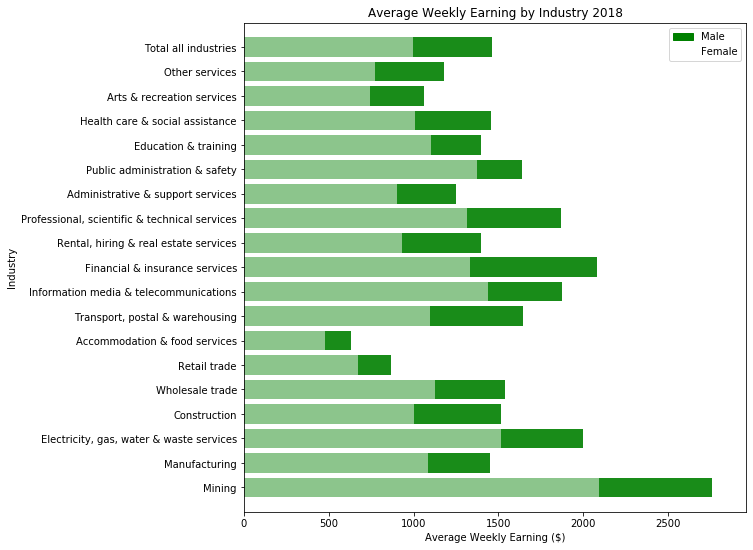

In [41]:
#Create a bar horizontal chart for 2018

plt.figure(figsize=(9,9))
plt.barh(x_axis,Average_wkly_Earning_by_industry_2018_df["Nov18_Male"],color="g",alpha=0.9)
plt.barh(x_axis,Average_wkly_Earning_by_industry_2018_df["Nov18_Female"],color="w",alpha=0.5)
plt.yticks(x_axis,Average_wkly_Earning_by_industry_2018_df["Industry"])
plt.style.use('_classic_test_patch')

#Set x and y limit
plt.ylim(-1,len(x_axis))
plt.xlim(0,max(Average_wkly_Earning_by_industry_2018_df["Nov18_Male"])+200)

#Set Title and labels
plt.title("Average Weekly Earning by Industry 2018")
plt.xlabel("Average Weekly Earning ($)")
plt.ylabel("Industry")

Male = mpatches.Patch(color="g",label = "Male")
Female = mpatches.Patch(color="w",label = "Female")
plt.legend(handles=[Male,Female],loc='best')


plt.tight_layout

plt.show()


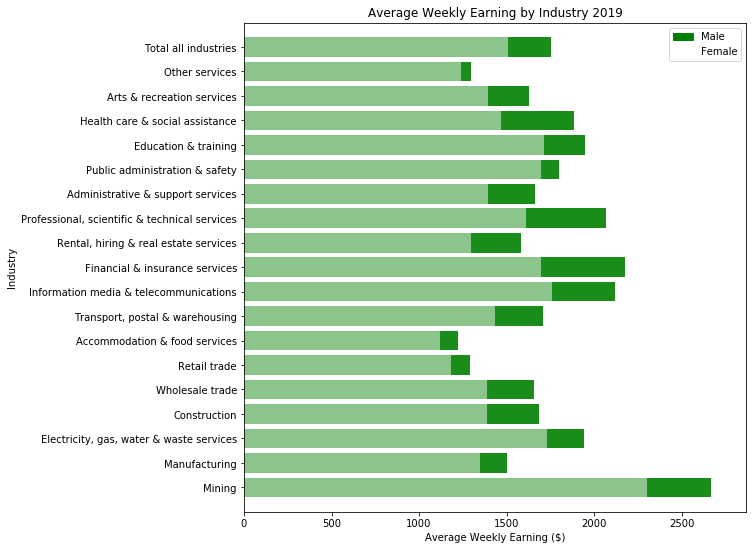

In [30]:
#Create a bar horizontal chart for 2019

plt.figure(figsize=(9,9))
plt.barh(x_axis,Average_wkly_Earning_by_industry_2019_df["Nov19_Male"],color="g",alpha=0.9)
plt.barh(x_axis,Average_wkly_Earning_by_industry_2019_df["Nov19_Female"],color="w",alpha=0.5)
plt.yticks(x_axis,Average_wkly_Earning_by_industry_2019_df["Industry"])
plt.style.use('_classic_test_patch')

#Set x and y limit
plt.ylim(-1,len(x_axis))
plt.xlim(0,max(Average_wkly_Earning_by_industry_2019_df["Nov19_Male"])+200)

#Set Title and labels
plt.title("Average Weekly Earning by Industry 2019")
plt.xlabel("Average Weekly Earning ($)")
plt.ylabel("Industry")
plt.legend

Male = mpatches.Patch(color="g",label = "Male")
Female = mpatches.Patch(color="w",label = "Female")
plt.legend(handles=[Male,Female],loc='best')

plt.tight_layout

plt.show()

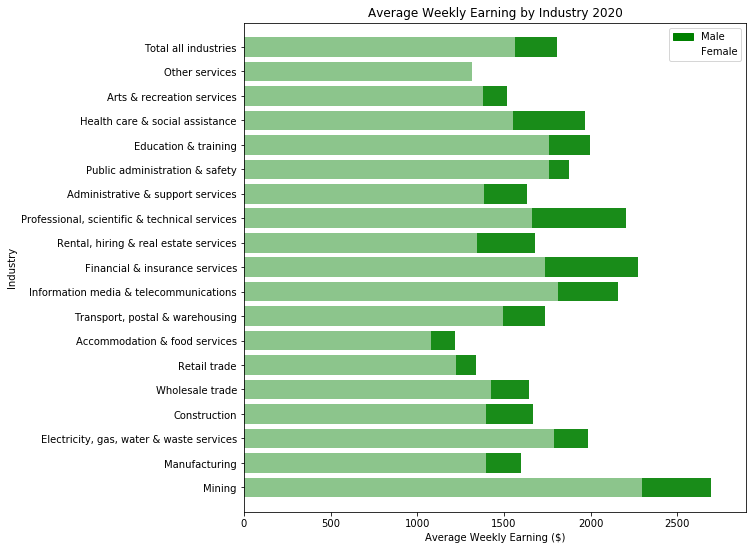

In [31]:
#Create a bar horizontal chart for 2020

plt.figure(figsize=(9,9))
plt.barh(x_axis,Average_wkly_Earning_by_industry_2020_df["Nov20_Male"],color="g",alpha=0.9)
plt.barh(x_axis,Average_wkly_Earning_by_industry_2020_df["Nov20_Female"],color="w",alpha=0.5)
plt.yticks(x_axis,Average_wkly_Earning_by_industry_2020_df["Industry"])
plt.style.use('_classic_test_patch')

#Set x and y limit
plt.ylim(-1,len(x_axis))
plt.xlim(0,max(Average_wkly_Earning_by_industry_2020_df["Nov20_Male"])+200)

#Set Title and labels
plt.title("Average Weekly Earning by Industry 2020")
plt.xlabel("Average Weekly Earning ($)")
plt.ylabel("Industry")
plt.legend

Male = mpatches.Patch(color="g",label = "Male")
Female = mpatches.Patch(color="w",label = "Female")
plt.legend(handles=[Male,Female],loc='best')


plt.tight_layout

plt.show()

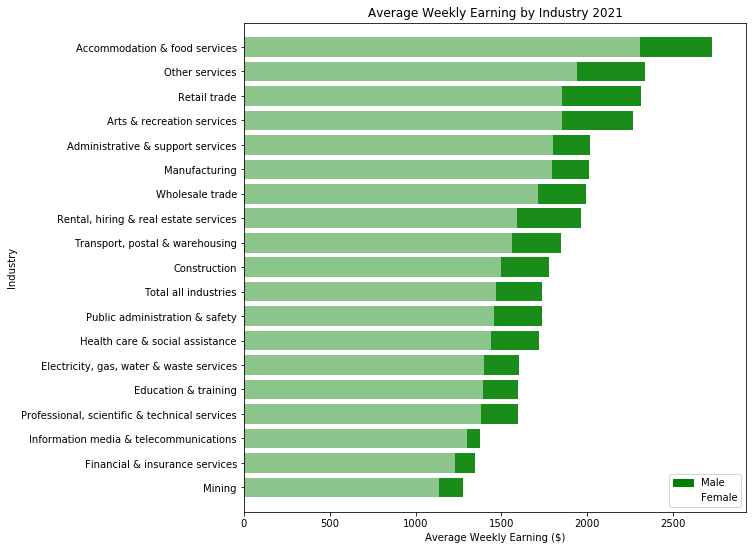

In [59]:
#Create a bar horizontal chart for 2021

plt.figure(figsize=(9,9))
plt.barh(x_axis,Average_wkly_Earning_by_industry_2021_df["Nov21_Male"],data=Average_wkly_Earning_by_industry_2021_df,color="g",alpha=0.9)
plt.barh(x_axis,Average_wkly_Earning_by_industry_2021_df["Nov21_Female"],data=Average_wkly_Earning_by_industry_2021_df,color="w",alpha=0.5)
plt.yticks(x_axis,Average_wkly_Earning_by_industry_2021_df["Industry"])
plt.style.use('_classic_test_patch')

#Set x and y limit
plt.ylim(-1,len(x_axis))
plt.xlim(0,max(Average_wkly_Earning_by_industry_2021_df["Nov21_Male"])+200)

#Set Title and labels
plt.title("Average Weekly Earning by Industry 2021")
plt.xlabel("Average Weekly Earning ($)")
plt.ylabel("Industry")
plt.legend

Male = mpatches.Patch(color="g",label = "Male")
Female = mpatches.Patch(color="w",label = "Female")
plt.legend(handles=[Male,Female],loc='best')


plt.tight_layout

plt.show()

In [33]:
#Recall the dataframe

Average_Wkly_Earning_data_Selected_Year_df

,Industry,Nov21_Male,Nov21_Female,Nov20_Male,Nov20_Female,Nov19_Male,Nov19_Female,Nov18_Male,Nov18_Female
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0


In [34]:
Average_Wkly_Earning_data_Selected_Year_df["Changes % 18 v 21"] = round(((Average_Wkly_Earning_data_Selected_Year_df["Nov21_Male"]-Average_Wkly_Earning_data_Selected_Year_df["Nov18_Male"])/Average_Wkly_Earning_data_Selected_Year_df["Nov18_Male"])*100,2)
Average_Wkly_Earning_data_Selected_Year_df

,Industry,Nov21_Male,Nov21_Female,Nov20_Male,Nov20_Female,Nov19_Male,Nov19_Female,Nov18_Male,Nov18_Female,Changes % 18 v 21
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0,-1.31
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0,10.60
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0,0.53
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0,17.16
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0,11.71
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0,58.27
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0,102.23
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0,5.57
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0,23.08
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0,12.07


In [35]:
Average_Wkly_Earning_data_Selected_Year_df["Changes % 19 v 21"] = round(((Average_Wkly_Earning_data_Selected_Year_df["Nov21_Male"]-Average_Wkly_Earning_data_Selected_Year_df["Nov19_Male"])/Average_Wkly_Earning_data_Selected_Year_df["Nov19_Male"])*100,2)
Average_Wkly_Earning_data_Selected_Year_df

,Industry,Nov21_Male,Nov21_Female,Nov20_Male,Nov20_Female,Nov19_Male,Nov19_Female,Nov18_Male,Nov18_Female,Changes % 18 v 21,Changes % 19 v 21
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0,-1.31,2.13
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0,10.60,6.48
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0,0.53,3.48
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0,17.16,5.54
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0,11.71,4.01
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0,58.27,6.41
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0,102.23,4.60
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0,5.57,1.79
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0,23.08,8.92
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0,12.07,7.18


In [36]:
Average_Wkly_Earning_data_Selected_Year_df["Changes % 20 v 21"] = round(((Average_Wkly_Earning_data_Selected_Year_df["Nov21_Male"]-Average_Wkly_Earning_data_Selected_Year_df["Nov20_Male"])/Average_Wkly_Earning_data_Selected_Year_df["Nov20_Male"])*100,2)
Average_Wkly_Earning_data_Selected_Year_df

,Industry,Nov21_Male,Nov21_Female,Nov20_Male,Nov20_Female,Nov19_Male,Nov19_Female,Nov18_Male,Nov18_Female,Changes % 18 v 21,Changes % 19 v 21,Changes % 20 v 21
0,Mining,2724.9,2306.3,2695.9,2295.8,2668.0,2302.0,2761.0,2093.0,-1.31,2.13,1.08
1,Manufacturing,1601.5,1394.9,1599.1,1397.8,1504.0,1349.0,1448.0,1086.0,10.60,6.48,0.15
2,"Electricity, gas, water & waste services",2007.6,1850.8,1986.8,1790.0,1940.0,1732.0,1997.0,1518.0,0.53,3.48,1.05
3,Construction,1776.2,1468.0,1668.0,1394.4,1683.0,1389.0,1516.0,1003.0,17.16,5.54,6.49
4,Wholesale trade,1720.4,1441.6,1641.5,1427.3,1654.0,1386.0,1540.0,1127.0,11.71,4.01,4.81
5,Retail trade,1373.8,1231.6,1336.5,1220.4,1291.0,1181.0,868.0,670.0,58.27,6.41,2.79
6,Accommodation & food services,1276.1,1133.1,1217.0,1078.8,1220.0,1121.0,631.0,480.0,102.23,4.60,4.86
7,"Transport, postal & warehousing",1737.6,1497.7,1733.4,1494.3,1707.0,1436.0,1646.0,1098.0,5.57,1.79,0.24
8,Information media & telecommunications,2310.2,1941.0,2158.1,1812.2,2121.0,1757.0,1877.0,1437.0,23.08,8.92,7.05
9,Financial & insurance services,2333.3,1852.8,2272.6,1736.5,2177.0,1694.0,2082.0,1335.0,12.07,7.18,2.67


In [37]:
Monitor_the_changes = Average_Wkly_Earning_data_Selected_Year_df[["Industry","Changes % 18 v 21","Changes % 19 v 21","Changes % 20 v 21"]]
Monitor_the_changes

,Industry,Changes % 18 v 21,Changes % 19 v 21,Changes % 20 v 21
0,Mining,-1.31,2.13,1.08
1,Manufacturing,10.60,6.48,0.15
2,"Electricity, gas, water & waste services",0.53,3.48,1.05
3,Construction,17.16,5.54,6.49
4,Wholesale trade,11.71,4.01,4.81
5,Retail trade,58.27,6.41,2.79
6,Accommodation & food services,102.23,4.60,4.86
7,"Transport, postal & warehousing",5.57,1.79,0.24
8,Information media & telecommunications,23.08,8.92,7.05
9,Financial & insurance services,12.07,7.18,2.67


#With the 2018, it was significantly lower value in Retail Trade and Accommodation&Food Services

Summary of Top 5 performing Industry in terms of the average weekly earning.  The position of these 5 industries has been steady for the past 4 years, with Male lead in all 18 industries
1. Mining
2. Financial & Insurance Services
3. Information media & Telecommunications
4. Professional,sientific & Tech sercices
5. Education & Training

Summary of Bottom 5 performing Industry in terms of the average weekly earning.  Accommodation & Food Services, Retails and Art had been consistently in the bottom 5 industries
1. Accommodation & Food Sercies
2. Other services
3. Retail trade
4. Art
5. Admin and Support services

In [38]:
#Leading survey from Gallup
url=https://www.gallup.com/workplace/389807/top-things-employees-next-job.aspx

url=https://hbr.org/2021/05/what-your-future-employees-want-most

SyntaxError: invalid syntax (Temp/ipykernel_15520/4039178009.py, line 2)